In [1]:
from skimage.io import imread,imsave,imshow
from skimage.color import rgb2hsv
from matplotlib.pyplot import cm

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Coding project - Picture enhancement

Write code that automatically enhances a photograph.

<img src="etretat.jpg" width="250px" />
<img src="ex_enhance.jpg" width="250px" />

"Enhance" may mean a lot of different things, and we encourage you to be creative in which enhancements you want to implement.

Some possibilities include (not an exhaustive list):

* Noise reduction
* Auto-level
* Gamma correction (with gamma provided by the user or automatically determined from the image histogram)
* Increase colour saturation
* ...

## Solutions
- Noise reduction : median filter
- Auto-level

In [2]:
im = imread('etretat.jpg')
original = im

In [3]:
# Noice reduction : median filter
from skimage.filters.rank import mean, median
from skimage.morphology import disk

def reduce_noise(im) :
    im_r = im[:,:,0]
    im_g = im[:,:,1]
    im_b = im[:,:,2]
    d = disk(1)
    im_median_r = median(im_r, d)
    im_median_g = median(im_g, d)
    im_median_b = median(im_b, d)

    # https://stackoverflow.com/questions/10443295/combine-3-separate-numpy-arrays-to-an-rgb-image-in-python/10463090
    return np.dstack((im_median_r,im_median_g,im_median_b))

In [4]:
# Auto-leveling
## Look up table based on the cumulative histogram
def cumul_hist(im) :
    cumul_hist = np.zeros((256,))
    c = 0
    
    for v in range(256) :
        c += (im==v).sum()
        cumul_hist[v] = c
    cumul_hist /= cumul_hist.max()
    return cumul_hist
def auto_level_image(im) :
    
    ch_r = cumul_hist(im[:,:,0])
    ch_g = cumul_hist(im[:,:,1])
    ch_b = cumul_hist(im[:,:,2])
    lut_r = (ch_r*255).astype("uint8") #or uint8, but not int8 !! will make appear negative values
    lut_g = (ch_g*255).astype("uint8") #or uint8, but not int8 !! will make appear negative values
    lut_b = (ch_b*255).astype("uint8") #or uint8, but not int8 !! will make appear negative values

    im_r = lut_r[im[:,:,0]]
    im_g = lut_r[im[:,:,1]]
    im_b = lut_r[im[:,:,2]] 

    # https://stackoverflow.com/questions/10443295/combine-3-separate-numpy-arrays-to-an-rgb-image-in-python/10463090
    return  np.dstack((im_r,im_g,im_b))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


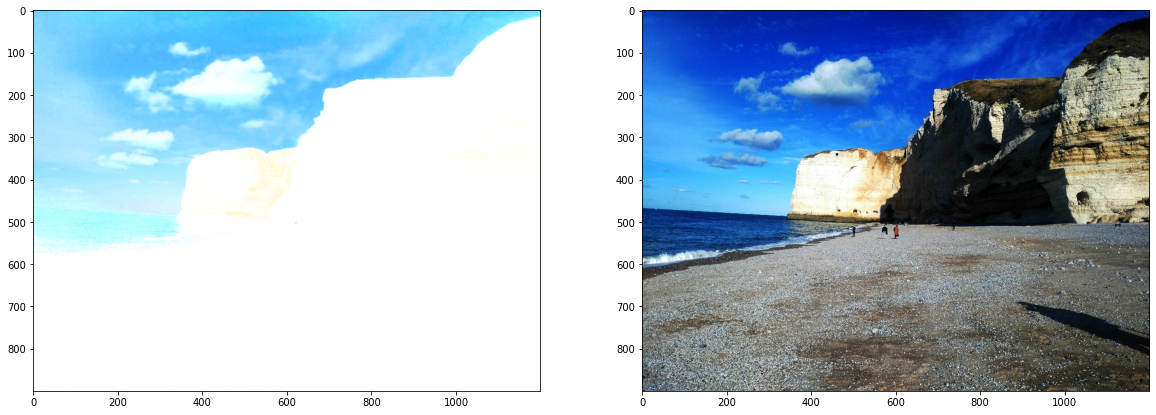

In [5]:
# Gamma correction, inspired from 
# https://www6.uniovi.es/hypgraph/color/gamma_correction/gamma_intro.html
from skimage.color import rgb2hsv, hsv2rgb

# im = imread('etretat.jpg')
# im = noice_reduced 
# im = auto_leveled

# Gamma given by the user
def gamma_correction(rgb_image, gamma) :
    hsv = rgb2hsv(rgb_image)
    v = hsv[:,:,2]
    v = v**(1-gamma)
    hsv[:,:,2] = v
    return hsv2rgb(hsv)


# Other way : by LUT (see course) ; when I really understand gamma correction
def lut_gamma(gamma):
    lut = np.power(np.arange(0,256),gamma) * 255**(1-gamma)
    return lut 

def gamma_correction_course(im, gamma) :
    lut = lut_gamma(gamma).astype("uint8")
    return lut[im]
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(gamma_correction(im, 2.99))
plt.subplot(1,2,2)
plt.imshow(gamma_correction_course(im, 2.99))
plt.show()

In [6]:
# Color saturation : similar to gamma
from skimage.color import rgb2hsv, hsv2rgb

# Choose the version you want to go from
# im = imread('etretat.jpg')
# im = noice_reduced 
# im = auto_leveled
# im = gamma_corrected

def color_saturation_modification(rgb_image, saturation_factor) :
    hsv = rgb2hsv(rgb_image)
    s = hsv[:,:,1]
    s = s*saturation_factor
    hsv[:,:,1] = s
    return hsv2rgb(hsv)


##  Enhancement

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


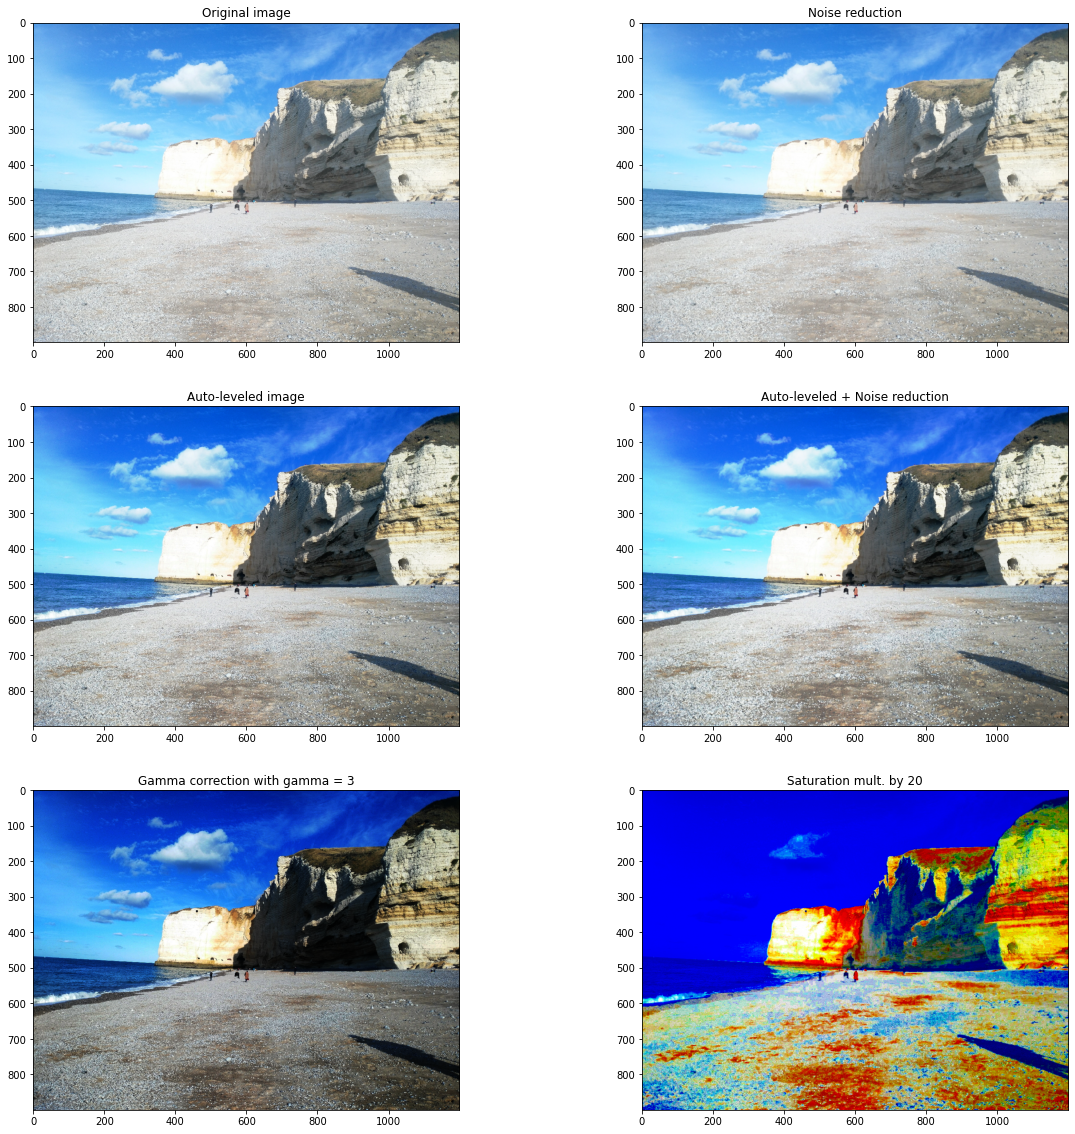

In [7]:
im = imread('etretat.jpg')

plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
plt.title("Original image")
plt.imshow(im)
plt.subplot(3,2,2)
plt.title("Noise reduction")
noice_reduced = reduce_noise(im)
plt.imshow(noice_reduced)
plt.subplot(3,2,3)
plt.title("Auto-leveled image")
auto_leveled = auto_level_image(im)
plt.imshow(auto_leveled)
plt.subplot(3,2,4)
plt.title("Auto-leveled + Noise reduction")
auto_leveled_noice = auto_level_image(reduce_noise(im))
plt.imshow(auto_leveled_noice)
plt.subplot(3,2,5)
gamma = 3
gamma_corrected = gamma_correction_course(im, gamma)
plt.title("Gamma correction with gamma = "+ str(gamma))
plt.imshow(gamma_corrected)
plt.subplot(3,2,6)
saturation_factor = 20
satured_image = color_saturation_modification(im, saturation_factor)
plt.title("Saturation mult. by "+ str(saturation_factor))
plt.imshow(satured_image)
plt.show()





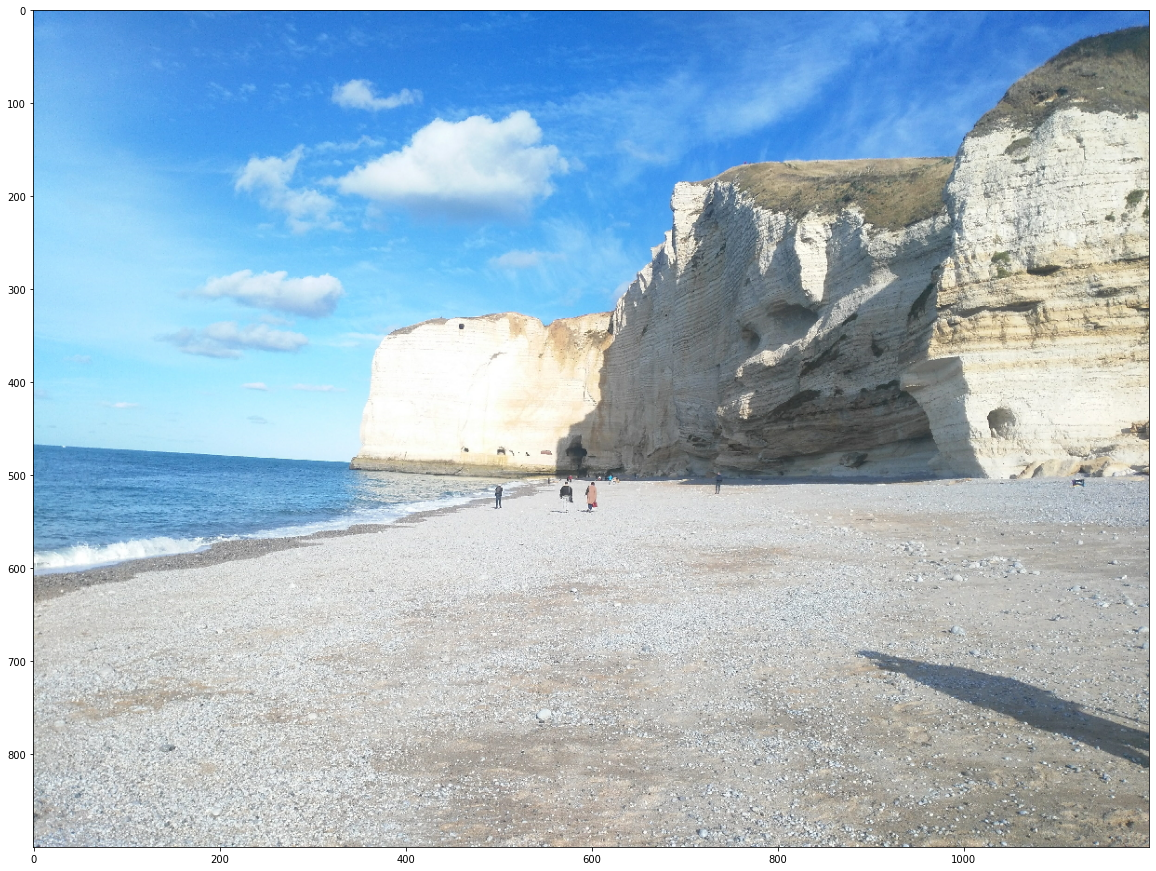

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


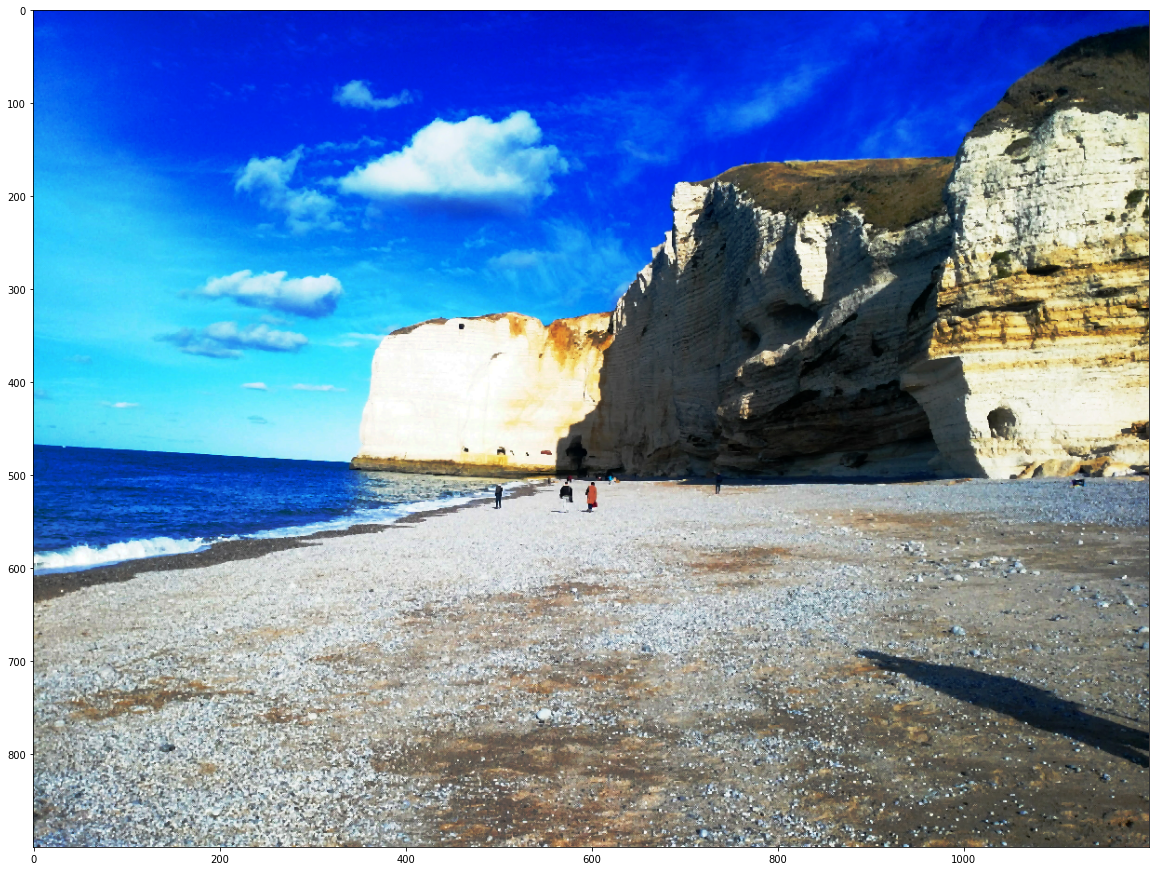

In [10]:
im = imread('etretat.jpg')
plt.figure(figsize=(20,20))
plt.imshow(im)
plt.show()

plt.figure(figsize=(20,20))
gamma = 1.25
saturation_factor = 1.25
all_enhanced = color_saturation_modification(gamma_correction_course(auto_level_image(reduce_noise(im)), gamma), saturation_factor)
plt.imshow(all_enhanced)
plt.show()